<h1>Plan B</h1>

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

<strong>Choose a Stock By Ticker Name</strong>

In [2]:
stock = 'tsla'

<strong>Choose a Start Date (earliest date: 05-03-2019)</strong>
(format mm-dd-yyyy)

In [3]:
start_date = '10-03-2019'

<strong>Choose an End Date (latest date: 08-03-2019)</strong>
(format mm-dd-yyyy)

In [4]:
end_date = '08-03-2020'

<hr>

In [5]:
df_stock = pd.read_csv(f'{stock}.csv')
len(df_stock)

2518

In [6]:
df_btc = pd.read_csv('btc.csv')
len(df_btc)

448

In [7]:
df_btc.rename(columns=lambda x: x.replace(' ', '').lower(), inplace=True)
df_btc.columns

Index(['date', 'close/last', 'volume', 'open', 'high', 'low'], dtype='object')

In [8]:
for date in range(len(df_stock.Date)):
    df_stock.Date[date] = datetime.strptime(df_stock.Date[date], '%m/%d/%Y').date()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
start_date = datetime.strptime(start_date, '%m-%d-%Y').date()
end_date = datetime.strptime(end_date, '%m-%d-%Y').date()
start_date

datetime.date(2019, 10, 3)

In [10]:
for date in range(len(df_btc.date)):
    df_btc.date[date] = datetime.strptime(df_btc.date[date], '%m/%d/%Y').date()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_btc = df_btc.query('date > @start_date' )
df_btc = df_btc.query('date < @end_date' )
df_btc

,date,close/last,volume,open,high,low
1,2020-08-02,11157.1,N/A,11968.2,11202.7,10981.6
2,2020-08-01,11941.5,N/A,11360.7,11943.4,11754.8
3,2020-07-31,11387.8,N/A,10972.3,11394.3,11226.1
4,2020-07-30,10980.8,N/A,10987.6,11124.4,10964.6
5,2020-07-29,10999.0,N/A,10970.9,11114.4,10959.9
...,...,...,...,...,...,...
300,2019-10-08,8166.4,N/A,8280.6,8205.6,8159.6
301,2019-10-07,8282.3,N/A,7834.5,8287.6,8198.5
302,2019-10-06,7965.4,N/A,8140.4,8145.5,7944.2
303,2019-10-05,8064.4,N/A,8141.7,8145.5,8031.4


In [12]:
df_stock.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-08-05,$1485.02,4978015,$1492.99,$1499.8384,$1468.31
1,2020-08-04,$1487,8414990,$1495.01,$1527.41,$1462
2,2020-08-03,$1485,8809346,$1449.2,$1509.8101,$1444.3844
3,2020-07-31,$1430.76,12246960,$1515,$1517.05,$1420.98
4,2020-07-30,$1487.49,7621039,$1488,$1513.24,$1471


In [13]:
for c in [' Close/Last', ' Open', ' High', ' Low']:
    df_stock[c] = df_stock[c].str.replace('$', '').astype(float)
df_stock.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,2020-08-05,1485.02,4978015,1492.99,1499.8384,1468.3100
1,2020-08-04,1487.00,8414990,1495.01,1527.4100,1462.0000
2,2020-08-03,1485.00,8809346,1449.20,1509.8101,1444.3844
3,2020-07-31,1430.76,12246960,1515.00,1517.0500,1420.9800
4,2020-07-30,1487.49,7621039,1488.00,1513.2400,1471.0000


In [14]:
df_stock.rename(columns=lambda x: x.replace(' ', '').lower(), inplace=True)
df_stock.columns

Index(['date', 'close/last', 'volume', 'open', 'high', 'low'], dtype='object')

In [15]:
avg_list = []
for date in df_stock.index:
    avg = (df_stock.high[date] + df_stock.low[date])/2
    avg_list.append(avg)
avg_list[0:5]

[1484.0742, 1494.705, 1477.0972499999998, 1469.0149999999999, 1492.12]

In [16]:
btc_list = []
for date in df_btc.index:
    avg = round(((df_btc.high[date] + df_btc.low[date])/2), 2)
    btc_list.append(avg)
btc_list[0:5]

[11092.15, 11849.1, 11310.2, 11044.5, 11037.15]

In [17]:
df_btc['btc_avg'] = btc_list
df_btc.head(5)

,date,close/last,volume,open,high,low,btc_avg
1,2020-08-02,11157.1,N/A,11968.2,11202.7,10981.6,11092.15
2,2020-08-01,11941.5,N/A,11360.7,11943.4,11754.8,11849.10
3,2020-07-31,11387.8,N/A,10972.3,11394.3,11226.1,11310.20
4,2020-07-30,10980.8,N/A,10987.6,11124.4,10964.6,11044.50
5,2020-07-29,10999.0,N/A,10970.9,11114.4,10959.9,11037.15


In [18]:
df_stock['stock_avg'] = avg_list
df_stock.head(5)

,date,close/last,volume,open,high,low,stock_avg
0,2020-08-05,1485.02,4978015,1492.99,1499.8384,1468.3100,1484.07420
1,2020-08-04,1487.00,8414990,1495.01,1527.4100,1462.0000,1494.70500
2,2020-08-03,1485.00,8809346,1449.20,1509.8101,1444.3844,1477.09725
3,2020-07-31,1430.76,12246960,1515.00,1517.0500,1420.9800,1469.01500
4,2020-07-30,1487.49,7621039,1488.00,1513.2400,1471.0000,1492.12000


In [19]:
df_premium = df_btc.drop(columns=['close/last', 'volume', 'open', 'high', 'low'], axis=1, inplace=False)
df_premium

,date,btc_avg
1,2020-08-02,11092.15
2,2020-08-01,11849.10
3,2020-07-31,11310.20
4,2020-07-30,11044.50
5,2020-07-29,11037.15
...,...,...
300,2019-10-08,8182.60
301,2019-10-07,8243.05
302,2019-10-06,8044.85
303,2019-10-05,8088.45


In [20]:
df_premium.set_index("date", inplace=True)
df_premium.head(1)

,btc_avg
date,
2020-08-02,11092.15


In [21]:
df_stock.set_index("date", inplace=True)
df_stock.head(1)

,close/last,volume,open,high,low,stock_avg
date,,,,,,
2020-08-05,1485.02,4978015,1492.99,1499.8384,1468.31,1484.0742


In [22]:
df_premium['stock_avg'] = df_stock['stock_avg']
df_premium = df_premium.reset_index()
df_premium.head(5)

,date,btc_avg,stock_avg
0,2020-08-02,11092.15,NaN
1,2020-08-01,11849.10,NaN
2,2020-07-31,11310.20,1469.015
3,2020-07-30,11044.50,1492.120
4,2020-07-29,11037.15,1510.905


In [23]:
format(1/11315*3144*10000, '.2f') 

'2778.61'

In [24]:
format(1/df_premium.btc_avg[0] * df_premium.stock_avg[0] * 10000, '.2f') # price in 10,000 sats

'nan'

In [25]:
sats_price_list = []
for date in df_premium.index:
    if df_premium.stock_avg[date]:
        sats_price = float(format(1/df_premium.btc_avg[date] * df_premium.stock_avg[date] * 10000, '.2f'))
        sats_price_list.append(sats_price)

df_premium['sats_price'] = sats_price_list
df_premium.head(5)

,date,btc_avg,stock_avg,sats_price
0,2020-08-02,11092.15,NaN,NaN
1,2020-08-01,11849.10,NaN,NaN
2,2020-07-31,11310.20,1469.015,1298.84
3,2020-07-30,11044.50,1492.120,1351.01
4,2020-07-29,11037.15,1510.905,1368.93


In [26]:
type(df_premium.sats_price[1])

numpy.float64

In [27]:
new_df = df_premium.query('date > datetime.strptime("07-03-2020", "%m-%d-%Y").date()' )
new_df = new_df.query('date < datetime.strptime("07-28-2020", "%m-%d-%Y").date()' )
new_df

,date,btc_avg,stock_avg,sats_price
6,2020-07-27,11041.65,1480.47015,1340.81
7,2020-07-26,10052.90,NaN,NaN
8,2020-07-25,9668.30,NaN,NaN
9,2020-07-24,9574.45,1415.77005,1478.70
10,2020-07-23,9572.40,1584.88500,1655.68
11,2020-07-22,9496.80,1594.21000,1678.68
12,2020-07-21,9371.35,1616.50000,1724.94
13,2020-07-20,9174.85,1569.00000,1710.11
14,2020-07-19,9197.70,NaN,NaN
15,2020-07-18,9162.15,NaN,NaN


In [28]:
df_premium.date[0] == '2020-08-03'

False

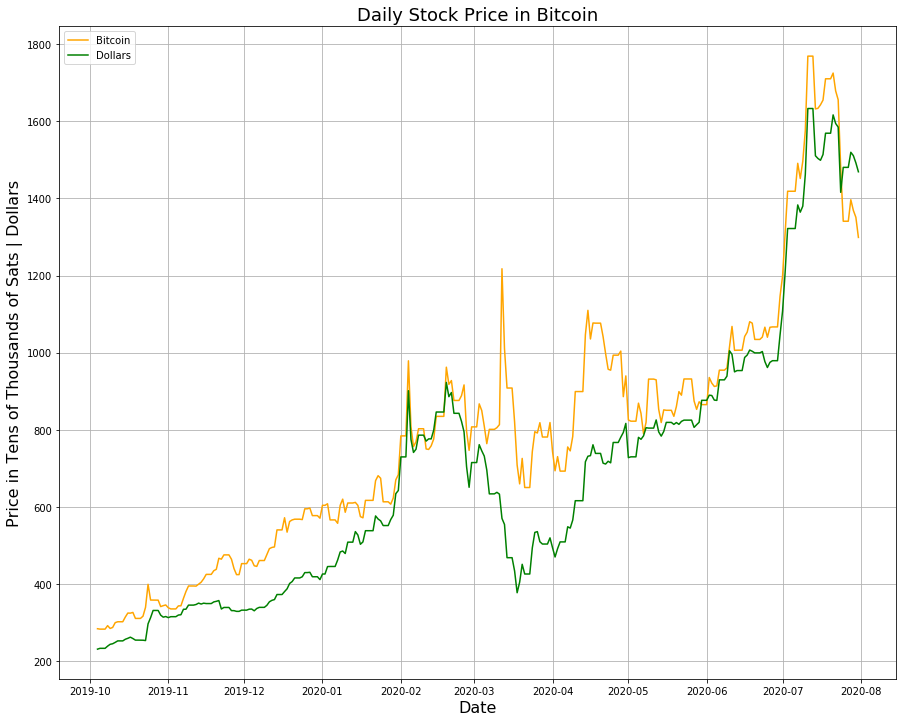

In [29]:
plt.subplots(figsize=(15, 12))
plt.grid(True)
plt.plot(df_premium.date, df_premium.sats_price.fillna(method='ffill'), color='orange')
plt.plot(df_premium.date, df_premium.stock_avg.fillna(method='ffill'), color='green')
plt.title('Daily Stock Price in Bitcoin', fontsize=18)
plt.ylabel('Price in Tens of Thousands of Sats | Dollars', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.savefig('image_1.png')
plt.legend(['Bitcoin', 'Dollars'], loc=2);

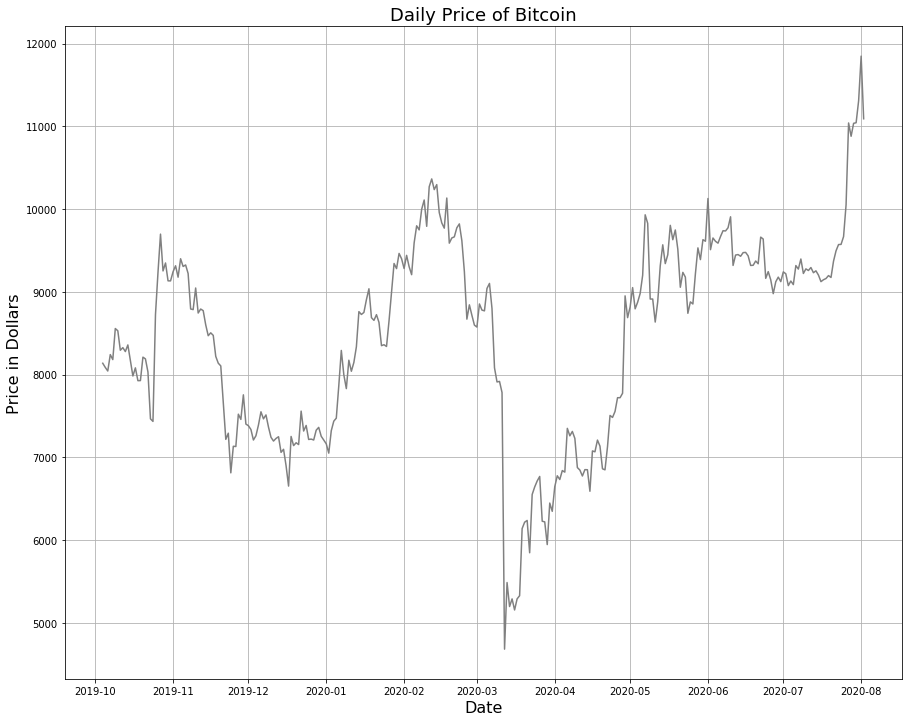

In [30]:
plt.subplots(figsize=(15, 12))
plt.grid(True)
plt.plot(df_premium.date, df_premium.btc_avg.fillna(method='ffill'), color='gray')
plt.title('Daily Price of Bitcoin', fontsize=18)
plt.ylabel('Price in Dollars', fontsize=16)
plt.xlabel('Date', fontsize=16);
# plt.savefig('image_1.png');

In [ ]:
#.summary?